## Exercise 10.1 (search)

We want to find the largest and smallest values in a long list of numbers. Implement
two algorithms, based on:

1. Iterating over the list entries; and 
1. First applying a built-in sort operation to the list.

Encapsulate each algorithm in a function. To create lists of numbers for testing use, for example:
```python
x = np.random.rand(1000)
```

### Solution

We first create the list of random numbers

In [0]:
import numpy as np
x = np.random.rand(1000)

#### Approach 1

In [217]:
def min_max1(x):
    if x[0] > x[1]:
        x_max = x[0]
        x_min = x[1]
    else:
        x_max = x[1]
        x_min = x[0]
    for i in range(len(x)):
        if x[i] > x_max:
            x_max = x[i]
        if x[i] < x_min:
            x_min = x[i]
    return  x_min, x_max
    
print(min_max1(x))

(0.00043709144117520804, 0.9995633088317006)


#### Approach 2

In [218]:
def min_max2(x):
    def quicksort(A, lo=0, hi=None):
        "Sort A and return sorted array"

        # Initialise data the first time function is called    
        if hi is None:
            A = A.copy()
            hi = len(A) - 1

        # Sort    
        if lo < hi:
            p = partition(A, lo,  hi)
            quicksort(A, lo, p - 1)
            quicksort(A, p + 1, hi)
        return A

    def partition(A, lo, hi):
        "Partitioning function for use in quicksort"
        pivot = A[hi]
        i = lo
        for j in range(lo,  hi):
            if A[j] <= pivot:
                A[i], A[j] = A[j], A[i]
                i += 1
        A[i], A[hi] = A[hi], A[i]
        return i
    
    y = quicksort(x)
    x_min = y[0]
    x_max = y[len(y)-1]

    return x_min, x_max


print(min_max2(x))

(0.00043709144117520804, 0.9995633088317006)


In [0]:
assert min_max1(x) == min_max2(x)

In practice, we would use the the NumPy function:

In [220]:
print(np.min(x), np.max(x))

0.00043709144117520804 0.9995633088317006


In [221]:
%time min_max1(x)
%time min_max2(x)
%time (np.min(x), np.max(x))

CPU times: user 754 µs, sys: 67 µs, total: 821 µs
Wall time: 831 µs
CPU times: user 8.19 ms, sys: 0 ns, total: 8.19 ms
Wall time: 10.1 ms
CPU times: user 260 µs, sys: 0 ns, total: 260 µs
Wall time: 209 µs


(0.00043709144117520804, 0.9995633088317006)

## Exercise 10.2 (Newton's method for root finding)

### Background

Newton's method can be used to find a root $x$ of a function $f(x)$ such that
$$
f(x) = 0
$$
A Taylor series expansion of $f$ about $x_{i}$ reads:
$$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} (x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$
If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:
\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}
In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.

### Task

Develop an implementation of Newton's method, with the following three functions in your implementation:
```python
def newton(f, df, x0, tol, max_it):
    # Implement here
    
    return x1  # return root
```
where `x0` is the initial guess, `tol` is the stopping tolerance, `max_it` is the maximum number 
of iterations, and 
```python
def f(x):
    # Evaluate function at x and return value


def df(x):
    # Evaluate df/dx at x and return value

```

Your implementation should raise an exception if the maximum number of iterations (`max_it`)
is exceeded.

Use your program to find the roots of:
$$
f(x) = \tan(x) - 2x
$$
between $-\pi/2$ and $\pi/2$. Plot $f(x)$ and $f^{\prime}(x)$ on the same graph, 
and show the roots computed by Newton's method.

Newton's method can be sensitive to the starting value. Make sure you find the root around $x = 1.2$. What happens if you start at $x = 0.9$? It may help to add a print statement in the iteration loop, showing $x$ and $f$ at each iteration.


### Extension (optional)

For a complicated function we might not know how to compute the derivative, or it may be very complicated
to evaluate. Write a function that computes the *numerical derivative* of $f(x)$ by evaluating 
$(f(x + dx) - f(x - dx)) / (2dx)$, where $dx$ is small. How should you choose $dx$?

### Solution

We first implement a Newton solver function:

## Exercise 10.2 (Newton's method for root finding)

### Background

Newton's method can be used to find a root $x$ of a function $f(x)$ such that
$$
f(x) = 0
$$
A Taylor series expansion of $f$ about $x_{i}$ reads:
$$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} (x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$
If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:
\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}
In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.

We now provide implementations of `f` and `df`, and find the roots:

In [0]:
def f(x):
    return np.tan(x) - (2 * x)
def df(x):
    return (1/np.cos(x))**2 - 2

In [0]:
def newton(f, df, x0, tol=1e-8, max_it=20):
    """Find root of equation defined by function f(x) where df(x) is
    first derivative and x is the initial guess.Optional arguments tol 
    (tolerance) and max_it (maximum number of iterations)"""
    error = tol + 1.0            #<--- your need to initialize x to the value of guess
    it = 0
    x1 = np.zeros(len(x0))
    tole = tol * len(x0)
    while error > tol:
        x1 = x0 - (f/df)
        x0 = x1
        if abs(x0 - x1) < tole:
            break
        it += 1
        if it >= max_it:
            break
    return x0

In [224]:
import scipy
x=-1.2
x = np.linspace(-np.pi/2, np.pi/2, 10)
#r1 = newton(f(x), df(x), x)
r0 = scipy.optimize.newton(f, x, tol=1e-08, maxiter=20)
print(r1, r0)

-1.1693460244525156 [-1.57081388e+00 -1.16556119e+00  4.37016320e-25  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.37824113e-25
  1.16556119e+00  1.57081388e+00]


We can visualise the result:

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot f and df/dx
x = np.linspace(-np.pi/2, np.pi/2, 100)
#roots = newton(f, df, x, tol=1e-8, max_it=20)

#plt.plot(x, f(x), label='$f(x)$')
#plt.plot(x, df(x), label="$f^{\prime}(x)$")

# Add location of roots to plot
#plt.plot(x, r, label='$scipy.roots$')
#plt.plot(x, r, label='$scipy.roots$')

plt.legend()
plt.show()

For the extension, we can replace the function `df(x)` with a new version

In [0]:
def df(x):
    # Try changing dx to 1e-15 or smaller
    dx = 1e-9
    # YOUR CODE HERE
    raise NotImplementedError()

In [0]:
# Find roots near -1.2, 0.1, and 1.2
xroots = np.array((newton(f, df, -1.2),
                   newton(f, df, 0.1),
                   newton(f, df, 1.2)))
assert np.isclose(xroots, [-1.16556119e+00, 2.08575213e-10, 1.16556119e+00]).all()

In [0]:
# Plot f, f' and roots

# YOUR CODE HERE
raise NotImplementedError()

In practice, we could use the Newton function `scipy.optimize.newton` from SciPy (http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) rather than implementing our own function.

## Exercise 10.3 (optional, low pass image filter)

Images files can be loaded and displayed with Matplotlib. An imported image is stored as a 
three-dimensional NumPy array of floats. The shape of the array is `[0:nx, 0:ny, 0:3]`. 
where `nx` is the number of pixels in the $x$-direction, `ny` is the number of pixels in the $y$-direction,
and the third axis is for the colour component (RGB: red, green and blue) intensity. See http://matplotlib.org/users/image_tutorial.html for more background.

Below we fetch an image and display it:

<class 'numpy.ndarray'>
Image array shape: (375, 500, 3)


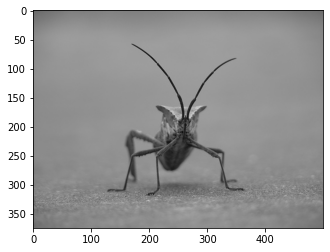

In [228]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import image
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/master/_images/stinkbug.png')

# Check type and shape
print(type(img))
print("Image array shape: {}".format(img.shape))

# Display image
plt.imshow(img);

The task is to write a *function* that applies a particular low-pass filter algorithm to an image array 
and  returns the  filtered image. With this particular filter, the value of a pixel in the filtered image 
is equal to the average value of the four neighbouring pixels in the original image. For the `[i, j, :]` pixel, 
the neighbours are  `[i, j+1, :]`, `[i, j-1, :]`, `[i+1, j, :]` and  `[i-1, j, :]`. 

Run the filter algorithm multiple times on the above image to explore the effect of the filter.

*Hint*: To create a NumPy array of zeros, `B`,  with the same shape as array `A`, use:
```python
import numpy as np
B = np.zeros_like(A)
```

In [0]:
# YOUR CODE HERE
raise NotImplementedError()